In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import svm

posting = pd.read_csv('fake_job_postings.csv')
pd.set_option("display.max_columns", None)
posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [64]:
job_advert = posting.drop(posting.columns[[0, 3, 4,1,5,6,7,14,8]], axis = 1)
job_advert.info()
job_advert.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   location             17534 non-null  object
 1   telecommuting        17880 non-null  int64 
 2   has_company_logo     17880 non-null  int64 
 3   has_questions        17880 non-null  int64 
 4   employment_type      14409 non-null  object
 5   required_experience  10830 non-null  object
 6   industry             12977 non-null  object
 7   function             11425 non-null  object
 8   fraudulent           17880 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [65]:
job_advert.nunique()

location               3105
telecommuting             2
has_company_logo          2
has_questions             2
employment_type           5
required_experience       7
industry                131
function                 37
fraudulent                2
dtype: int64

In [66]:
job_advert.employment_type.fillna(method='ffill', inplace = True)
job_advert.required_experience.fillna(method='ffill', inplace = True)
job_advert.industry.fillna(method='bfill', inplace = True)
job_advert.function.fillna(method='ffill', inplace = True)
job_advert.location.fillna(method='ffill', inplace = True)


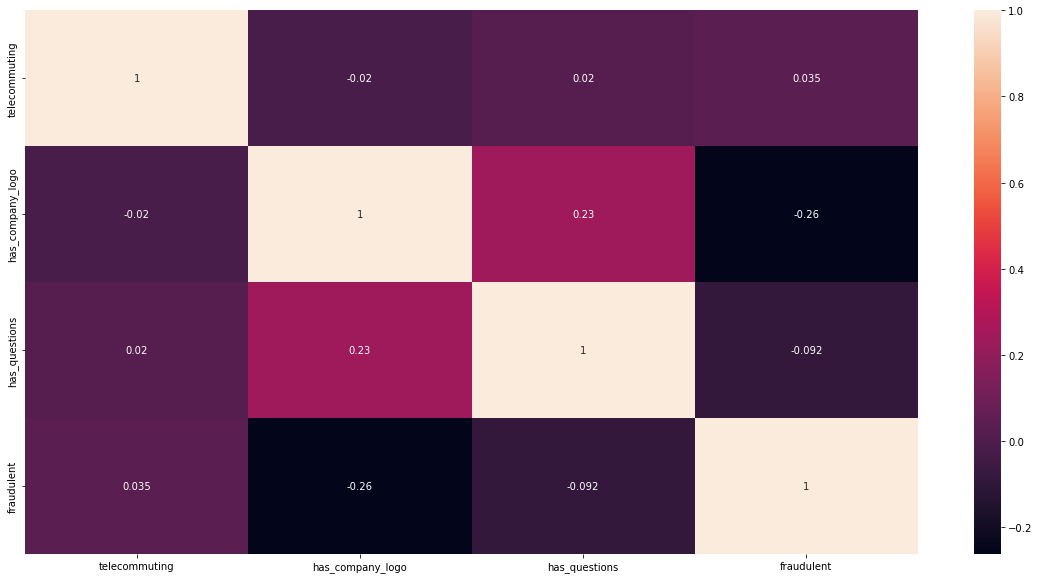

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(job_advert.corr(),annot=True);

In [67]:
job_code = pd.get_dummies(job_advert)
x = job_code.drop(['fraudulent'], axis = 1)
y = job_code['fraudulent']
job_code
x_train, x_test, y_train, y_test = train_test_split(
   x, y, random_state=42)
clfr2 = DecisionTreeClassifier()
clfr2.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
clfr2.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
clfr2.score(x_test, y_test)

0.9608501118568232